In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('./data/gym_churn_us.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

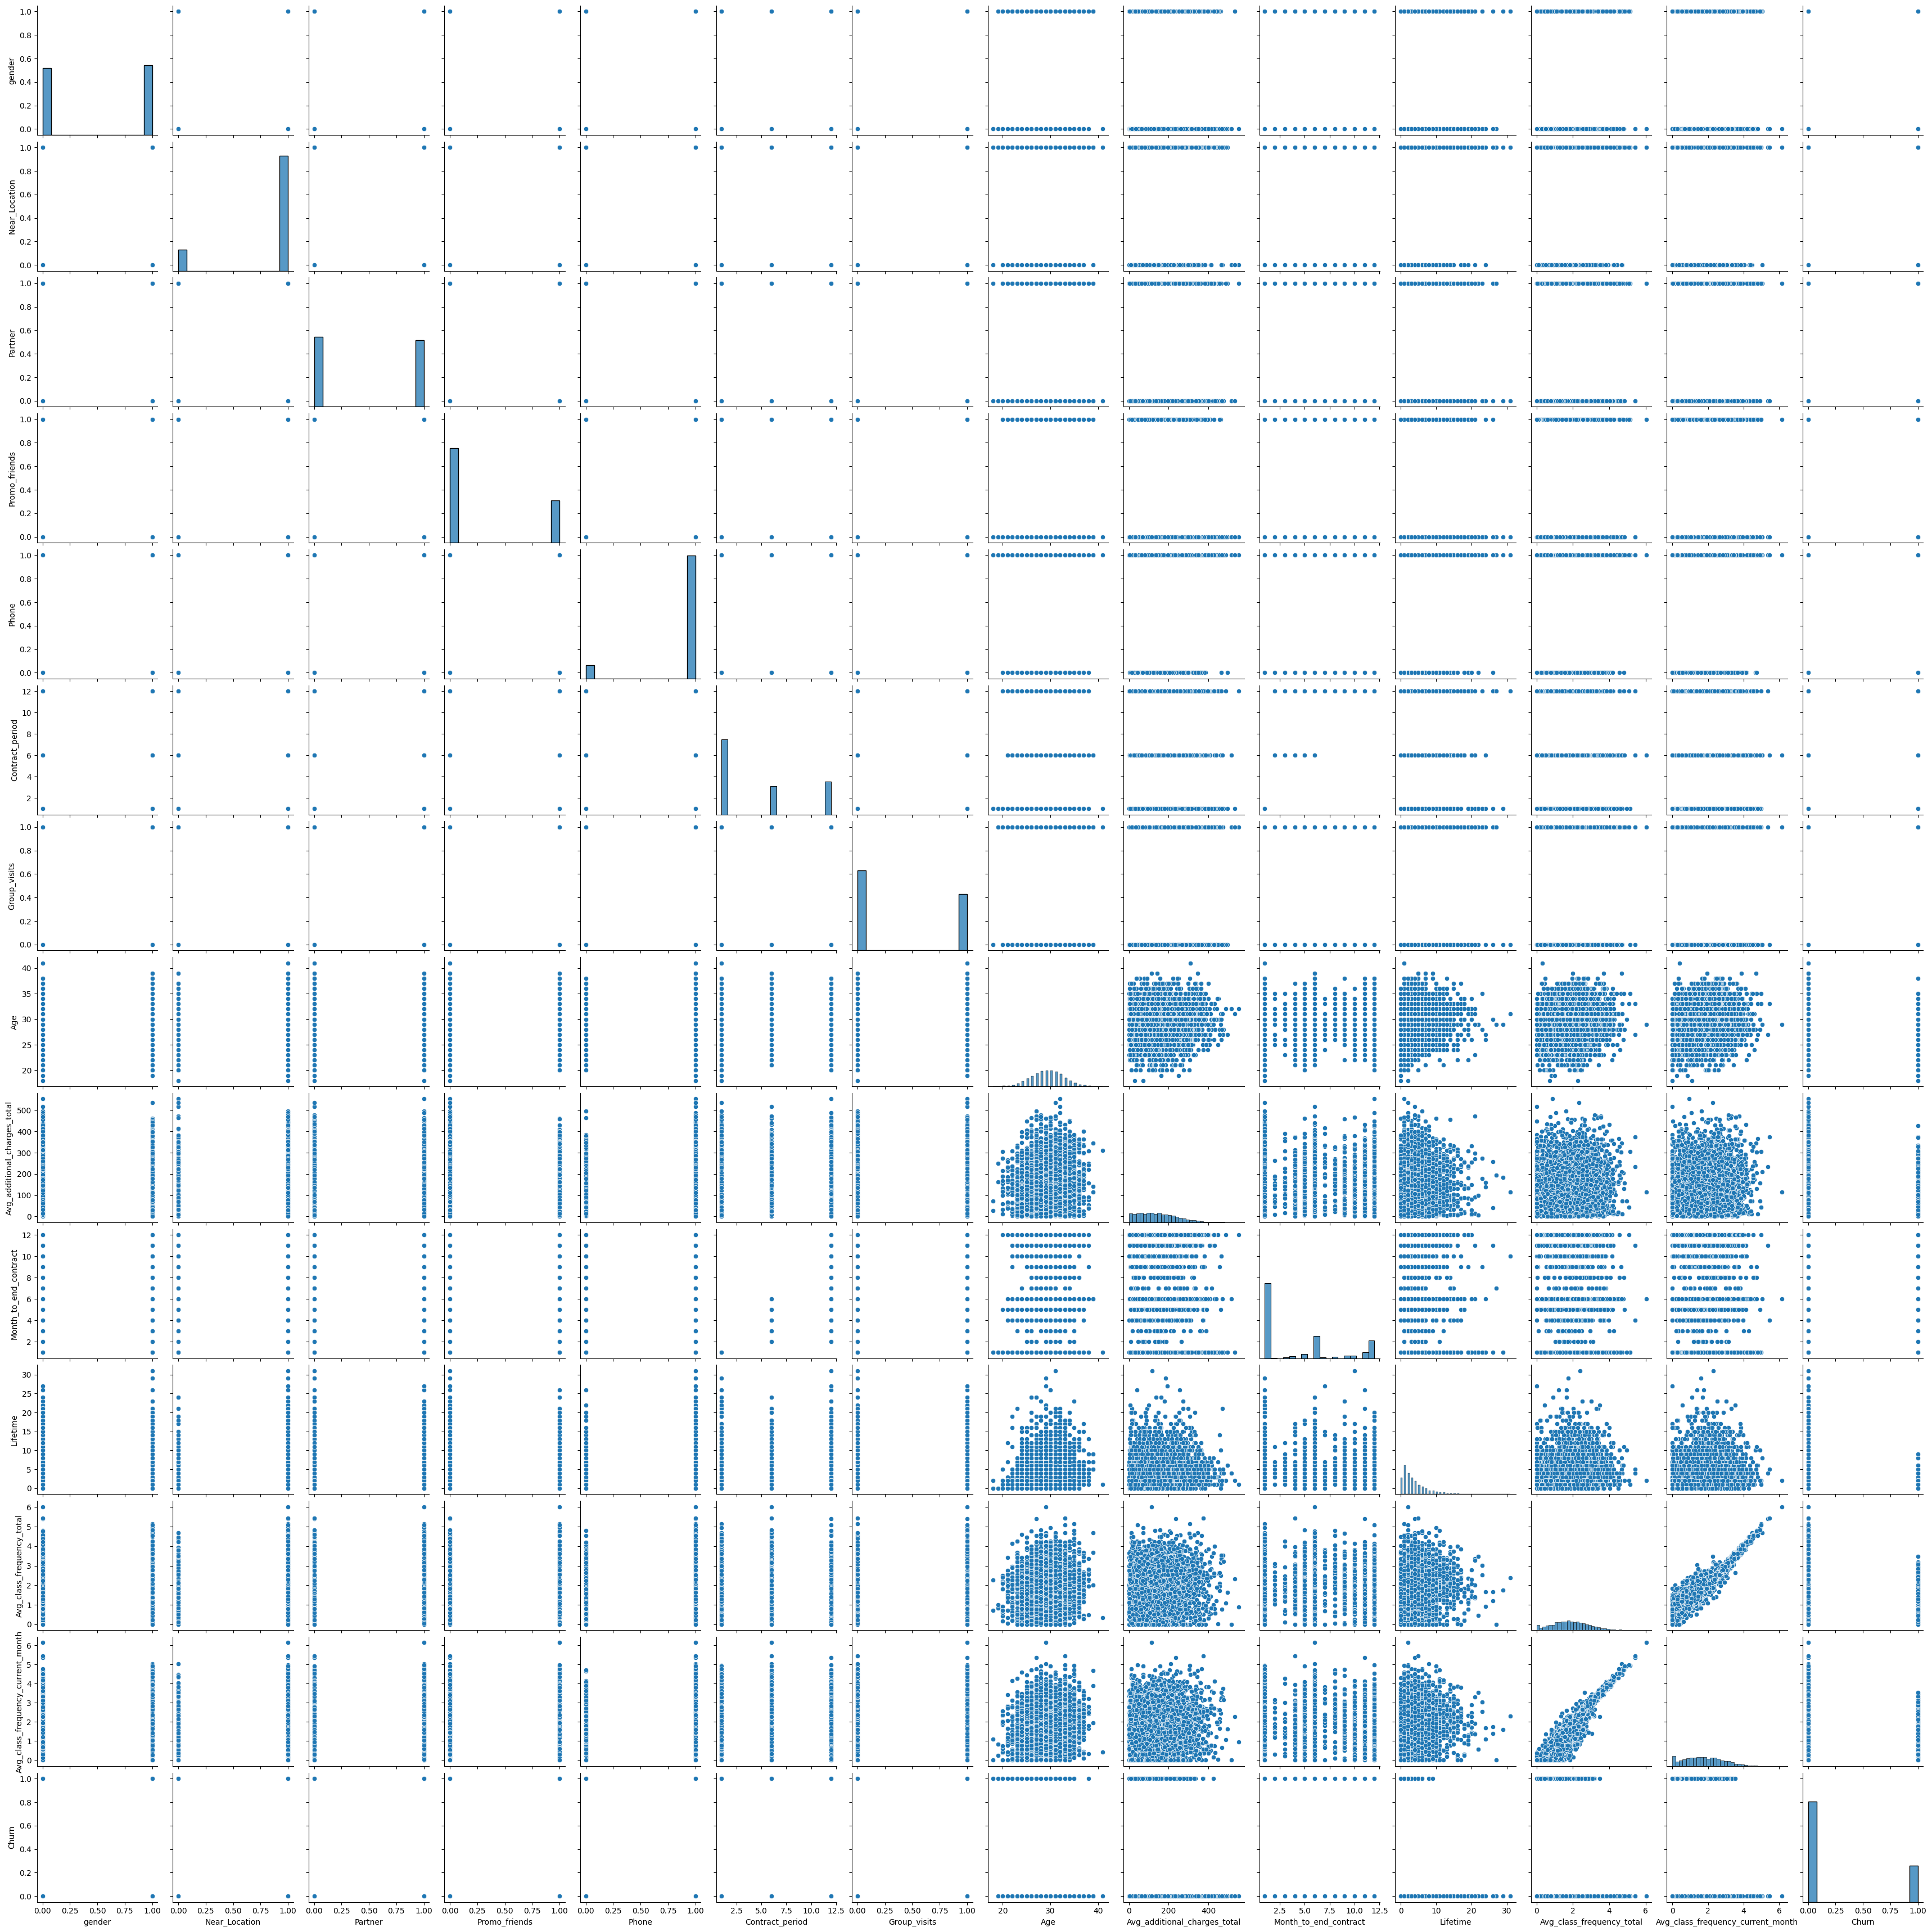

In [7]:
sns.pairplot(df)
plt.show()

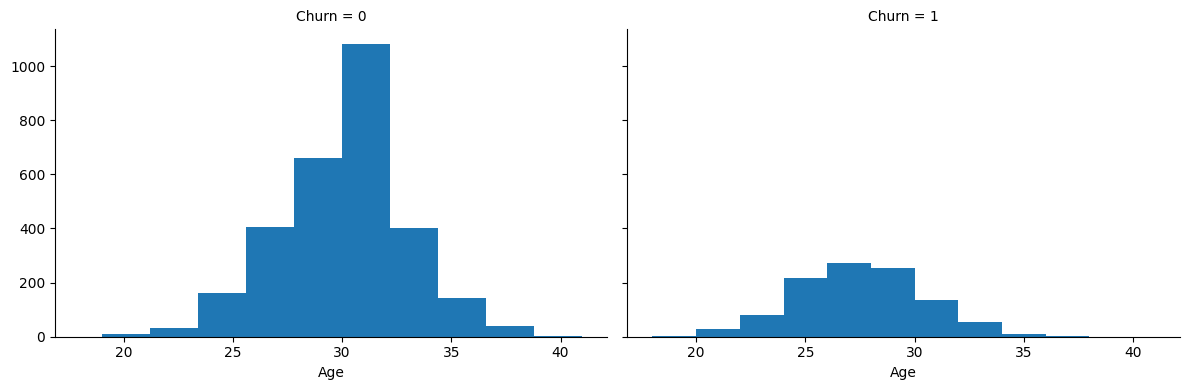

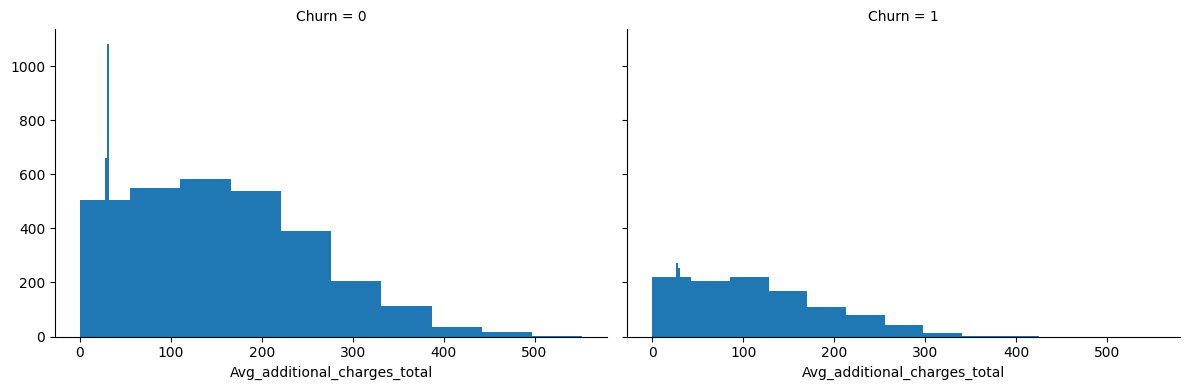

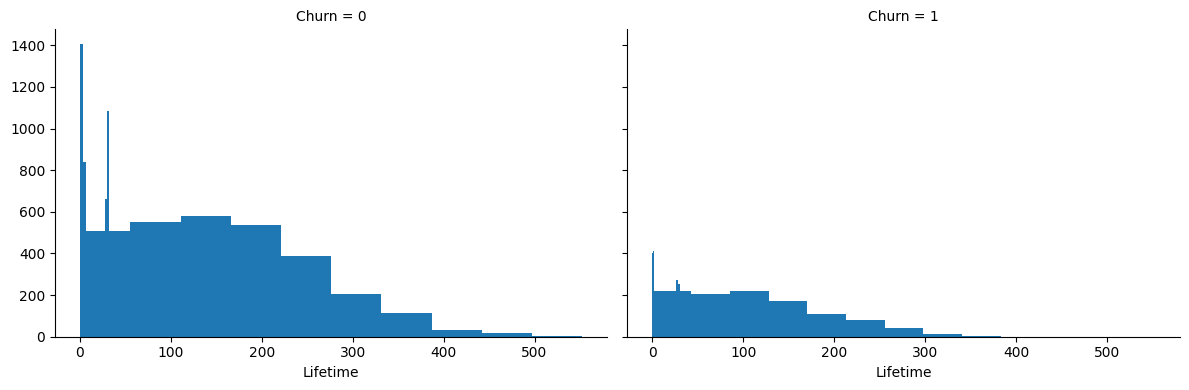

In [8]:
#compare age ,avg_additional_charges_total,and lifetime  across churn status

g=sns.FacetGrid(df,col="Churn",height=4,aspect=1.5)
g.map(plt.hist,'Age')
plt.show()

g.map(plt.hist, "Avg_additional_charges_total")
plt.show()

g.map(plt.hist, "Lifetime")
plt.show()

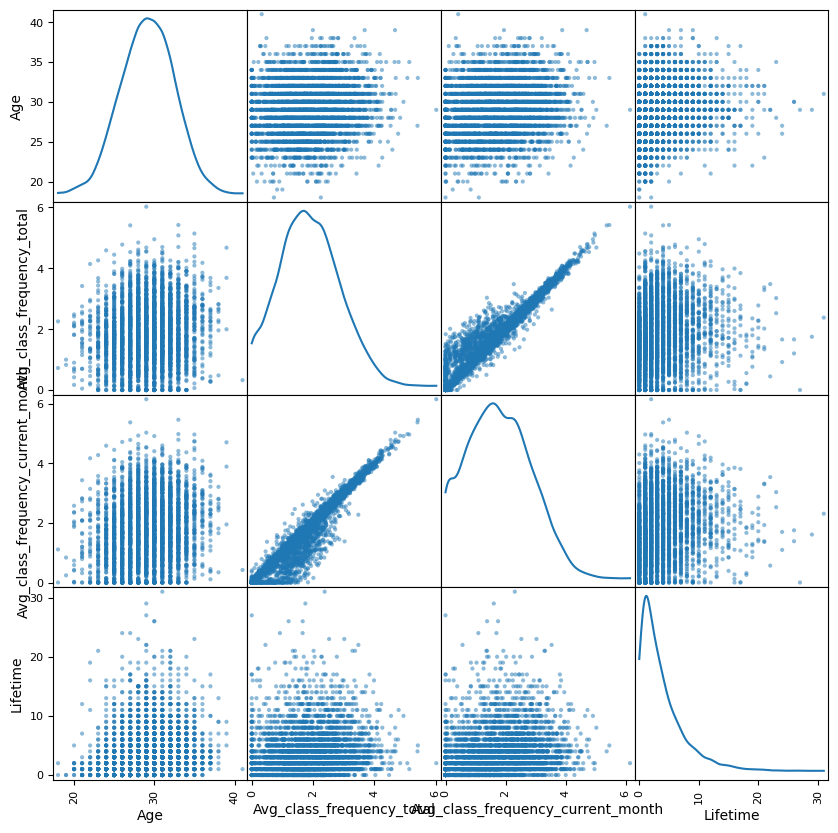

In [9]:
# Relationships between pairs of numerical features
pd.plotting.scatter_matrix(df[['Age', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Lifetime']], figsize=(10, 10), diagonal='kde')
plt.show()

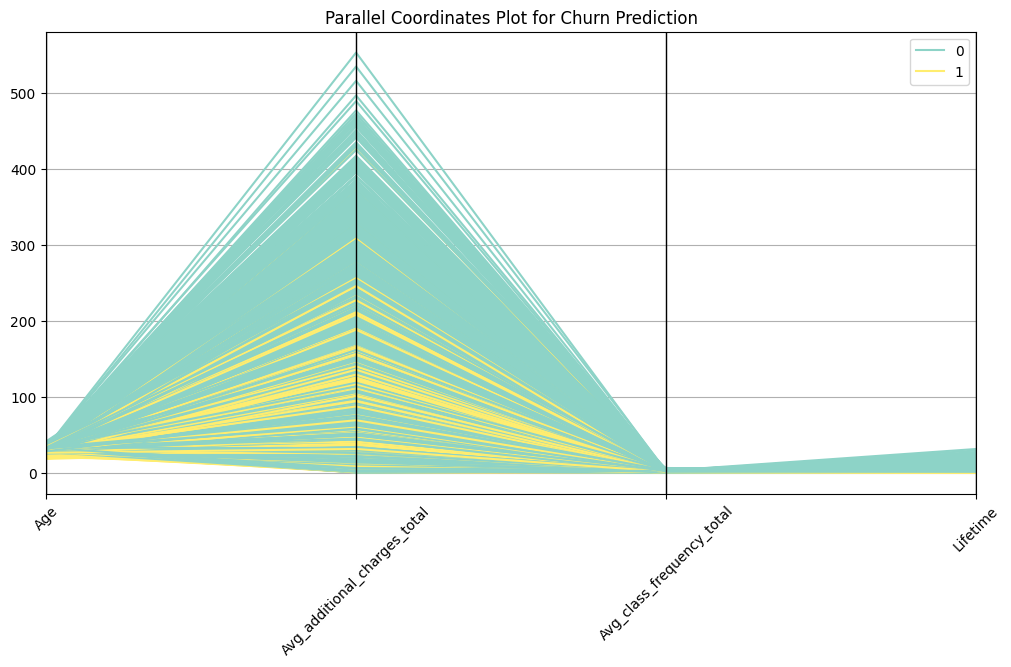

In [10]:
# Distribution of multiple numerical features across different classes
features = ['Age', 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Lifetime', 'Churn']

plt.figure(figsize=(12, 6))
parallel_coordinates(df[features], 'Churn', colormap=plt.get_cmap("Set3"))
plt.title("Parallel Coordinates Plot for Churn Prediction")
plt.xticks(rotation=45)
plt.show()

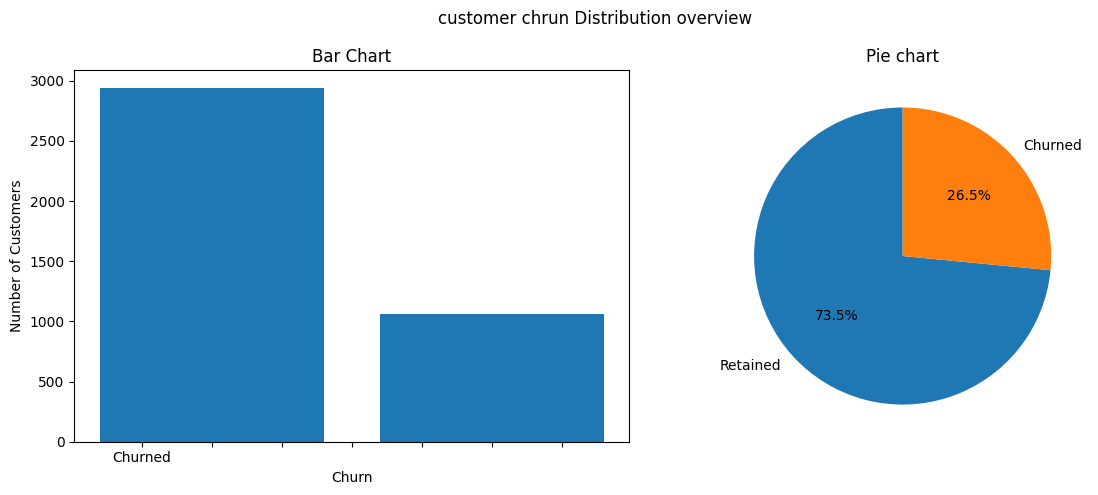

In [13]:
#calculate churn distribution
churn_count=df['Churn'].value_counts()

#create subplots
fig,axes =plt.subplots(1,2,figsize=(12,5))

#bar subplot
axes[0].bar(churn_count.index,churn_count.values)
axes[0].set_xlabel([0,1])
axes[0].set_xticklabels(['Retained','Churned'])
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Bar Chart')


#pie_chart
axes[1].pie(churn_count.values,labels=['Retained','Churned'],autopct='%1.1f%%',startangle=90)
axes[1].set_title('Pie chart')

#adjust layout
fig.suptitle("customer chrun Distribution overview")
plt.tight_layout()
plt.show()


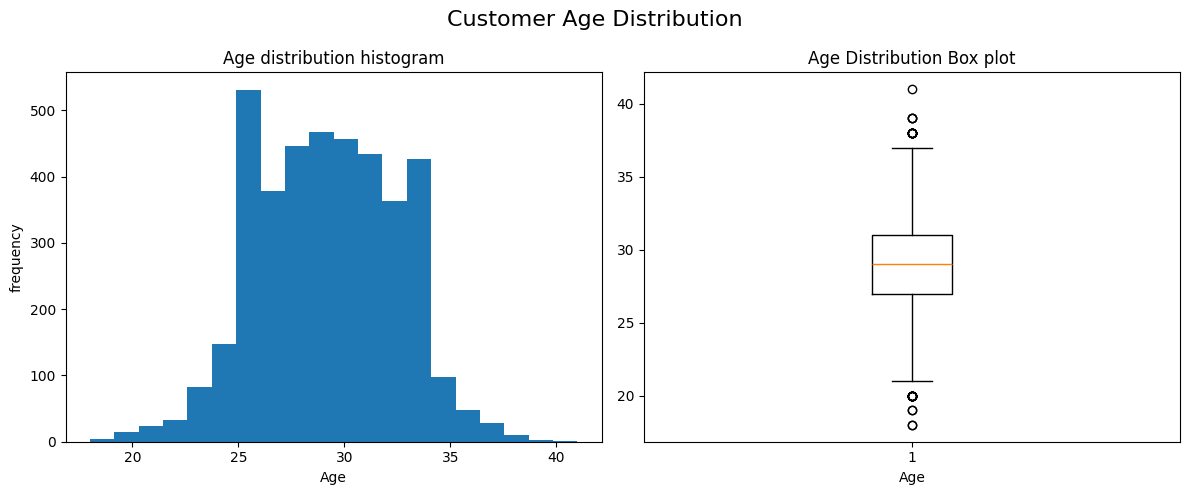

In [15]:
#age distribution

fig,axes=plt.subplots(1,2,figsize=(12,5))
#histogram
axes[0].hist(df['Age'],bins=20)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('frequency')
axes[0].set_title('Age distribution histogram')

#box plot
axes[1].boxplot(df['Age'])
axes[1].set_xlabel('Age')
axes[1].set_title('Age Distribution Box plot')

fig.suptitle('Customer Age Distribution',fontsize=16)
plt.tight_layout()
plt.show()

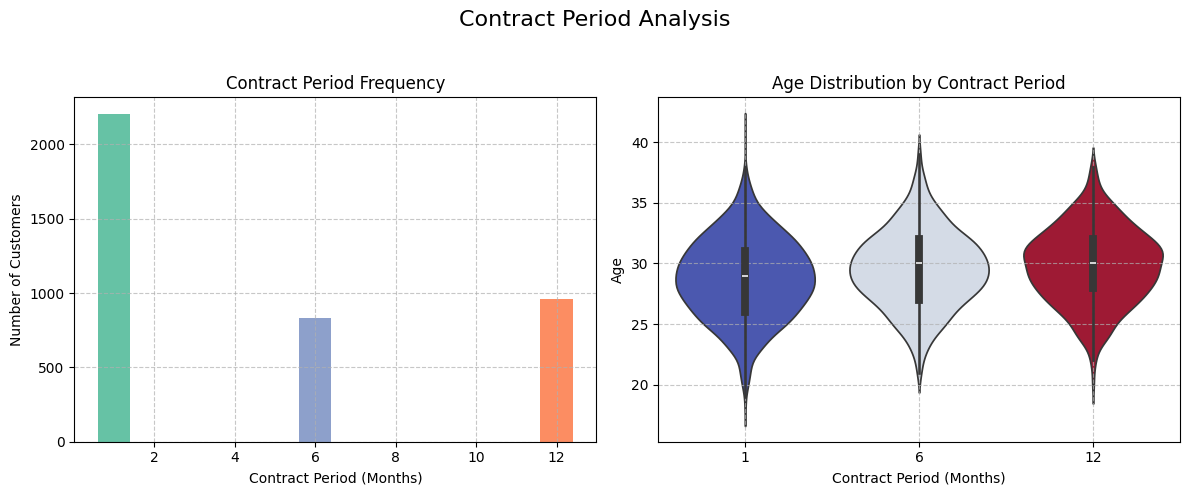

In [21]:

# Bar Chart: Contract Period Frequency
contract_counts = df['Contract_period'].value_counts()

# Set color palette
sns.set_palette("Set2")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart
axes[0].bar(contract_counts.index, contract_counts.values, color=sns.color_palette("Set2"))
axes[0].set_xlabel('Contract Period (Months)')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Contract Period Frequency')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Violin Plot with hue
sns.violinplot(x='Contract_period', y='Age', data=df, ax=axes[1], hue='Contract_period', palette="coolwarm", dodge=False, legend=False)
axes[1].set_xlabel('Contract Period (Months)')
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution by Contract Period')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout and add a main title
fig.suptitle('Contract Period Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

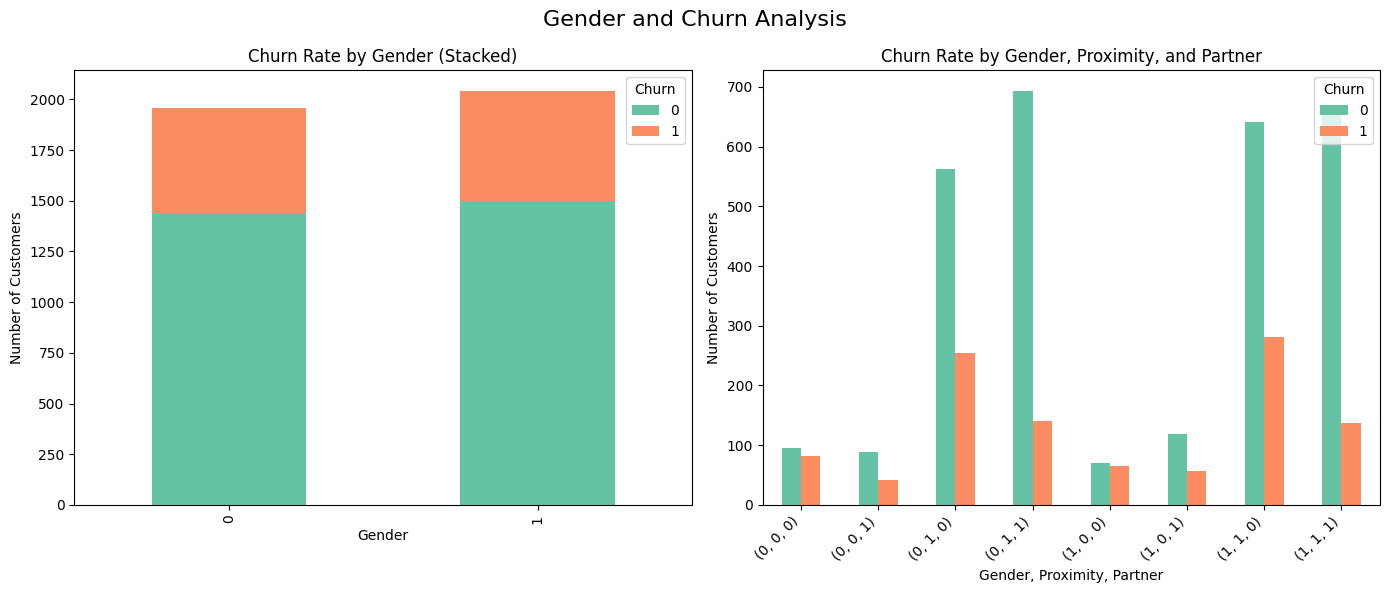

In [23]:
# Stacked Bar Chart: Gender vs. Churn
gender_churn = df.groupby(['gender', 'Churn']).size().unstack()

# Grouped Bar Chart: Gender, Proximity, Partner, and Churn
gender_proximity_churn = df.groupby(['gender', 'Near_Location', 'Partner', 'Churn']).size().unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked Bar Chart
gender_churn.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Churn Rate by Gender (Stacked)')
axes[0].legend(title='Churn', loc='upper right')


# Grouped Bar Chart
gender_proximity_churn.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Gender, Proximity, Partner')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Churn Rate by Gender, Proximity, and Partner')
axes[1].legend(title='Churn', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Adjust layout
fig.suptitle('Gender and Churn Analysis', fontsize=16)
plt.tight_layout()
plt.show()


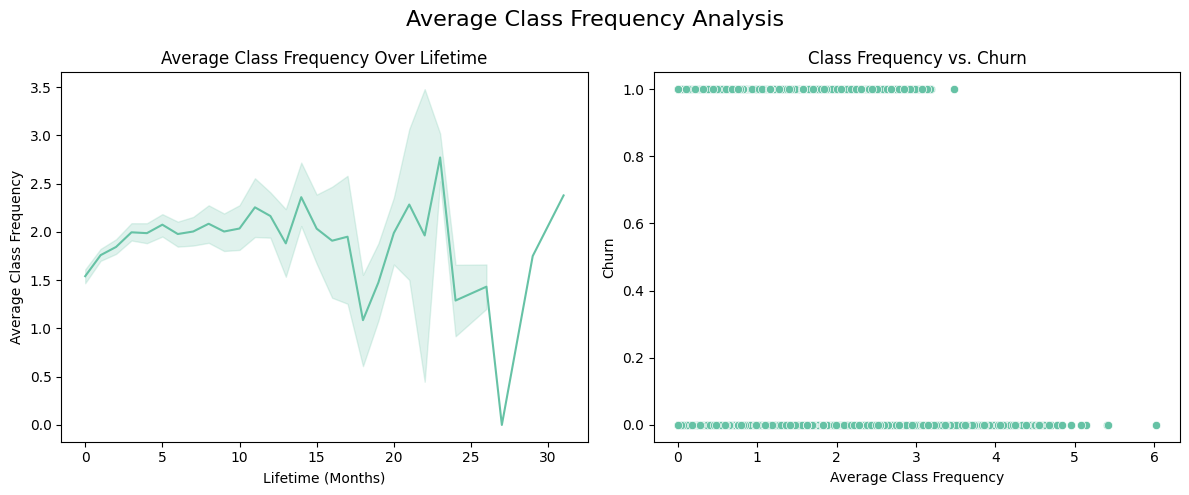

In [26]:


# Average Class Frequency Analysis

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Line Plot: Average Class Frequency over Lifetime
sns.lineplot(x='Lifetime', y='Avg_class_frequency_total', data=df, ax=axes[0])
axes[0].set_xlabel('Lifetime (Months)')
axes[0].set_ylabel('Average Class Frequency')
axes[0].set_title('Average Class Frequency Over Lifetime')

# Scatter Plot: Class Frequency vs. Churn
sns.scatterplot(x='Avg_class_frequency_total', y='Churn', data=df, ax=axes[1])
axes[1].set_xlabel('Average Class Frequency')
axes[1].set_ylabel('Churn')
axes[1].set_title('Class Frequency vs. Churn')

# Adjust layout
fig.suptitle('Average Class Frequency Analysis', fontsize=16)
plt.tight_layout()
plt.show()


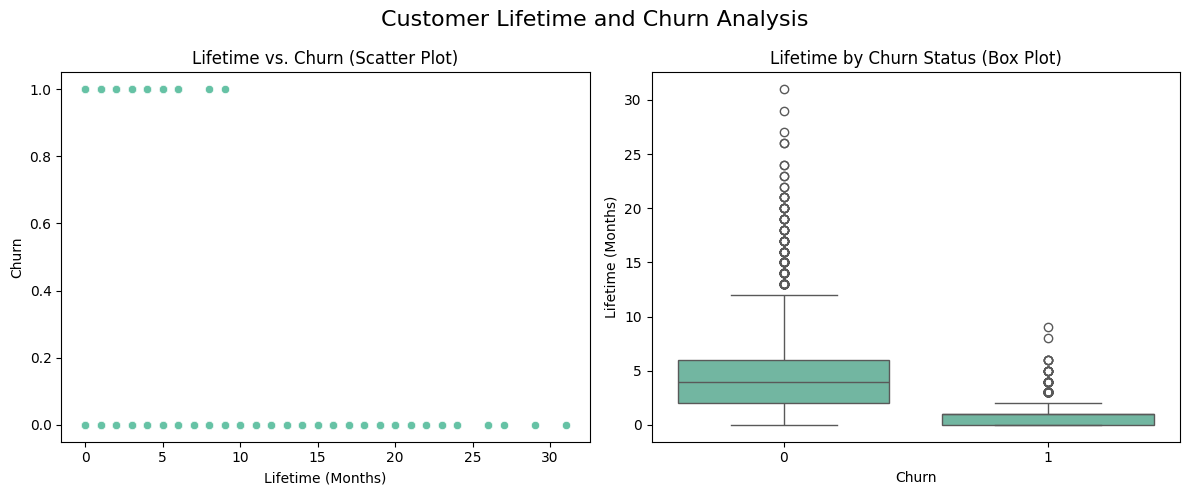

In [28]:
# Lifetime vs. Churn

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter Plot: Lifetime vs. Churn
sns.scatterplot(x='Lifetime', y='Churn', data=df, ax=axes[0])
axes[0].set_xlabel('Lifetime (Months)')
axes[0].set_ylabel('Churn')
axes[0].set_title('Lifetime vs. Churn (Scatter Plot)')

# Box Plot: Lifetime by Churn Status
sns.boxplot(x='Churn', y='Lifetime', data=df, ax=axes[1])
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Lifetime (Months)')
axes[1].set_title('Lifetime by Churn Status (Box Plot)')

# Adjust layout
fig.suptitle('Customer Lifetime and Churn Analysis', fontsize=16)
plt.tight_layout()
plt.show()

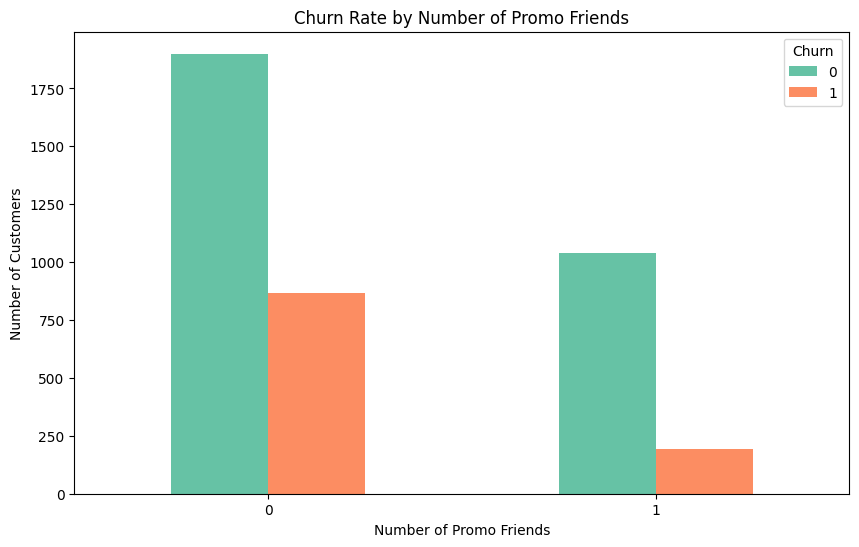

In [29]:
# Promo Friends and Churn

# Group data by 'Promo_friends' and 'Churn' and count occurrences
promo_churn = df.groupby(['Promo_friends', 'Churn']).size().unstack()

# Create a bar chart
promo_churn.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Promo Friends')
plt.ylabel('Number of Customers')
plt.title('Churn Rate by Number of Promo Friends')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()


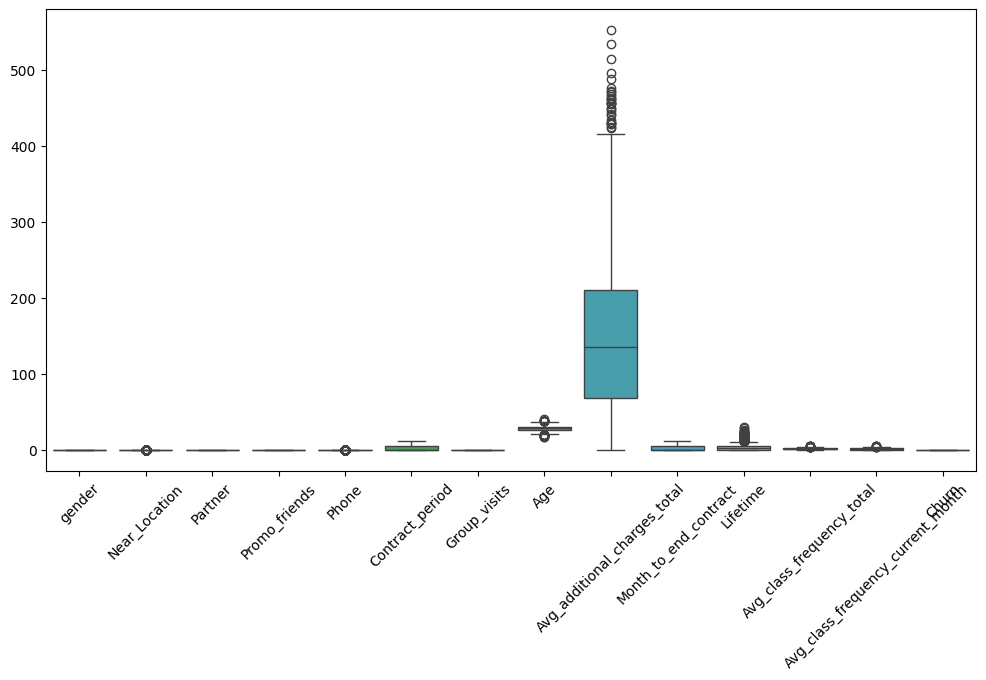

In [30]:
# Check outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

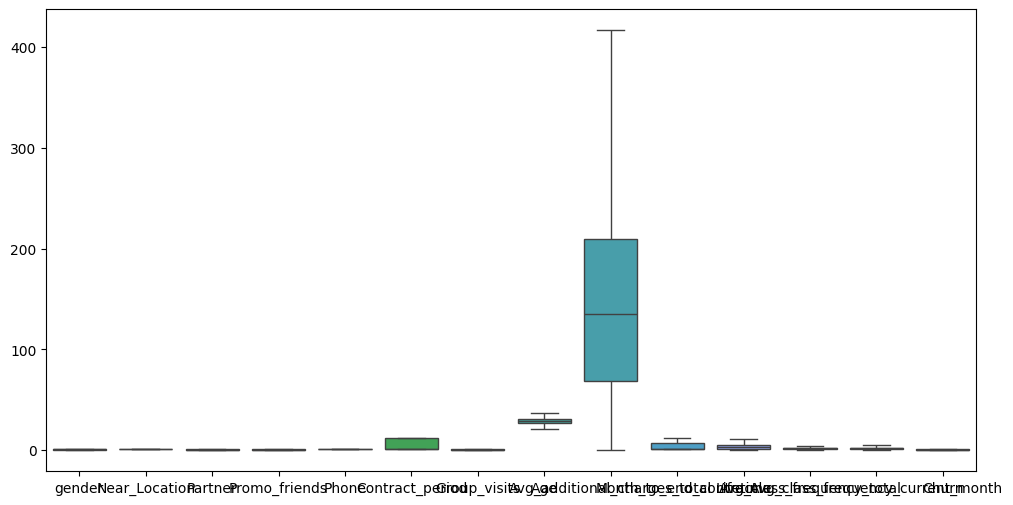

In [31]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the df to remove outliers
df= df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Verify removal of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
# plt.xticks(rotation=45)
plt.show()

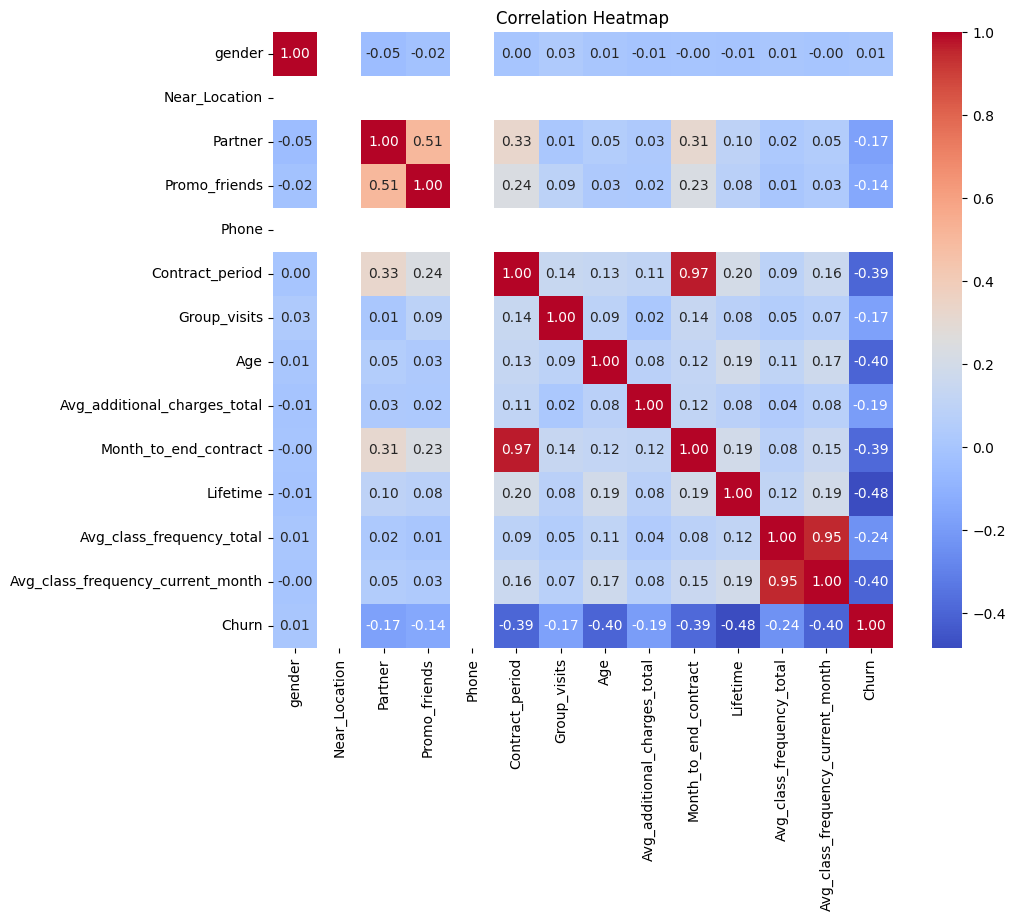

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df = df.drop(['Near_Location', 'Phone'], axis=1)


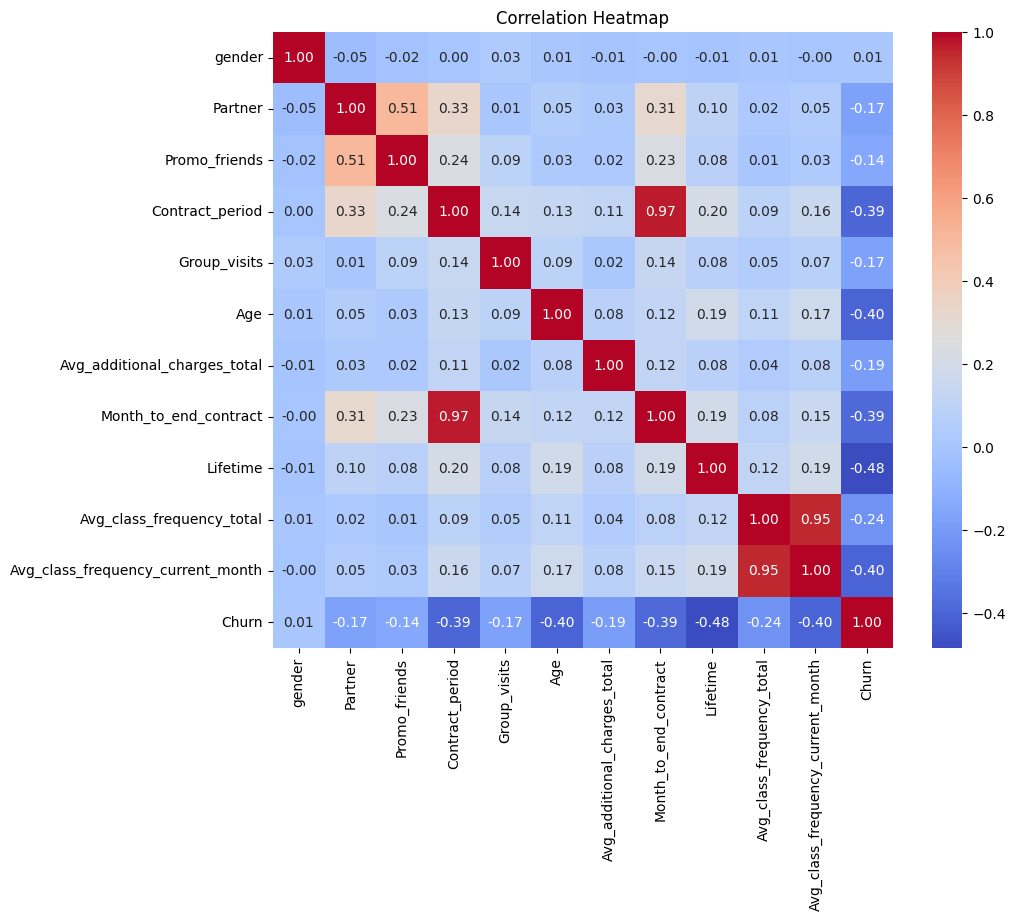

In [34]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [35]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## # Random forest

In [ ]:
rfClassifier=RandomForestClassifier(random_state=42)
rfClassifier.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [95]:
import joblib
joblib.dump(rfClassifier, "model/radomforest_classifier.pkl")

['model/radomforest_classifier.pkl']

In [59]:
y_pred_train=rfClassifier.predict(X_train)


#calcualte metrices
train_accuracy=accuracy_score(y_train,y_pred_train)
train_precision=precision_score(y_train,y_pred_train,average='binary')
train_recall=recall_score(y_train,y_pred_train,average='binary')
train_f1=f1_score(y_train,y_pred_train,average='binary')

print(f'train acurracy:{train_accuracy}')
print(f'train precisoin:{train_precision}')
print(f'train rcall:{train_recall}')
print(f'train f1: {train_f1}')

train acurracy:1.0
train precisoin:1.0
train rcall:1.0
train f1: 1.0


In [60]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1473
           1       1.00      1.00      1.00       515

    accuracy                           1.00      1988
   macro avg       1.00      1.00      1.00      1988
weighted avg       1.00      1.00      1.00      1988



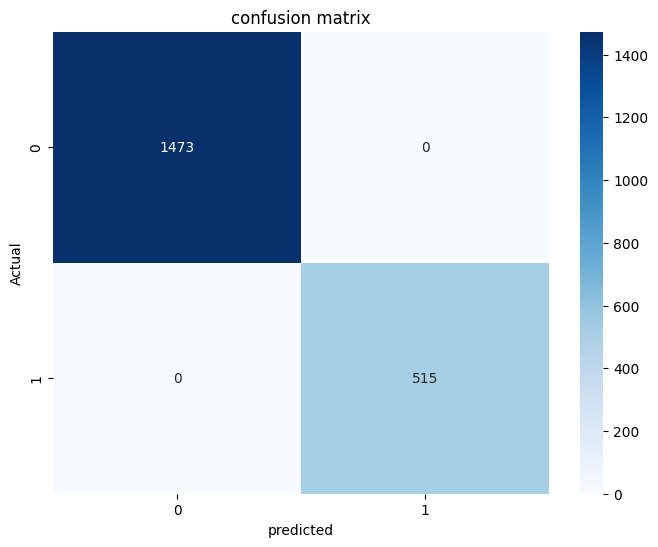

In [61]:
cm=confusion_matrix(y_train,y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

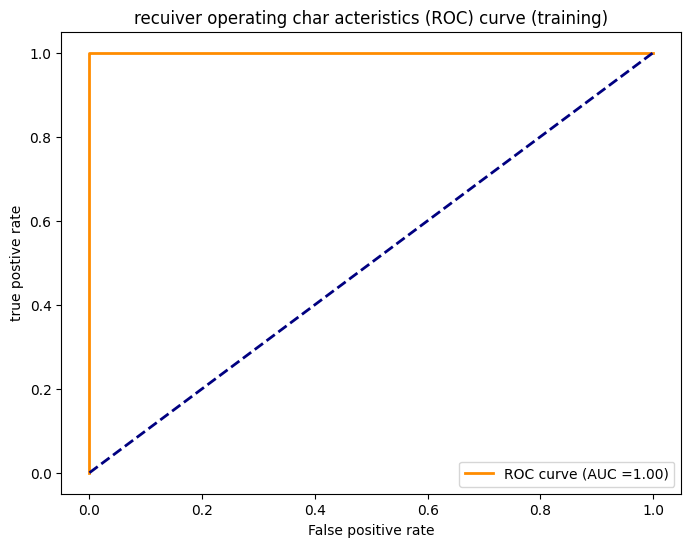

In [62]:
y_pred_proba_train=rfClassifier.predict_proba(X_train)[:,1]

#calculate roc curve taining

fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_pred_proba_train)

#AOC
roc_acu_train=roc_auc_score(y_train,y_pred_proba_train)


#
plt.figure(figsize=(8,6))
plt.plot(fpr_train,tpr_train,color='darkorange',lw=2,label=f"ROC curve (AUC ={roc_acu_train:.2f})")

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('true postive rate')
plt.title('recuiver operating char acteristics (ROC) curve (training)')

plt.legend(loc='lower right')
plt.show()

In [63]:
y_pred = rfClassifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.9320
Test Precision: 0.8512
Test Recall: 0.8756
Test F1 Score: 0.8632


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       644
           1       0.85      0.88      0.86       209

    accuracy                           0.93       853
   macro avg       0.91      0.91      0.91       853
weighted avg       0.93      0.93      0.93       853



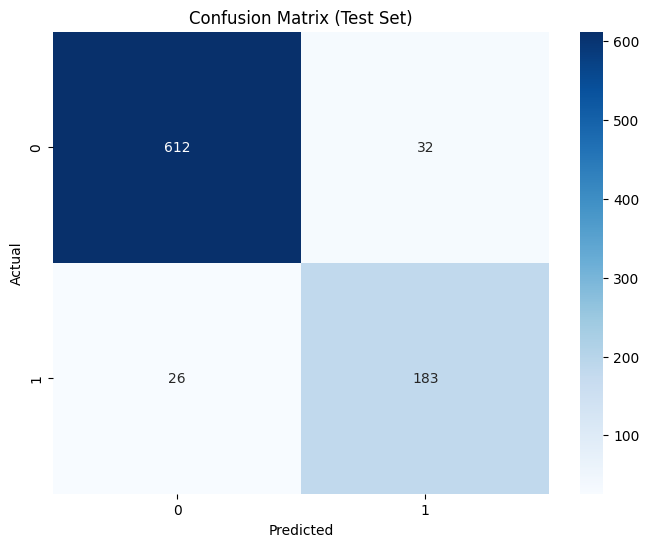

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

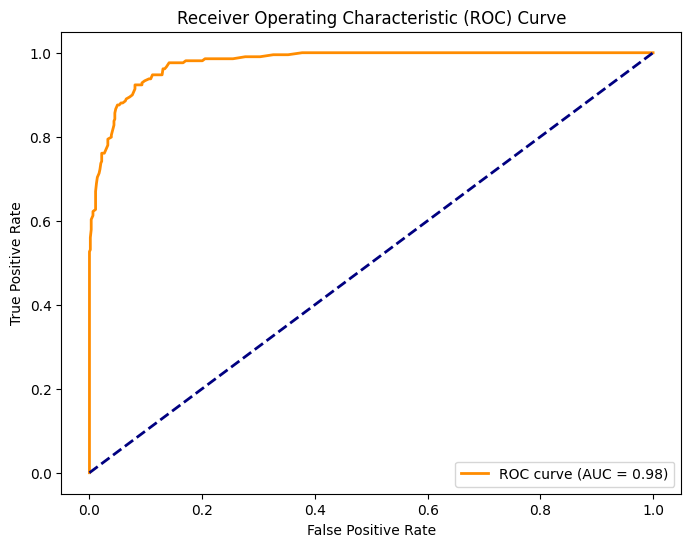

In [66]:
y_pred_proba = rfClassifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## adaboost


In [67]:
ada_classifier = AdaBoostClassifier(random_state=42)

ada_classifier.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

In [94]:
import joblib
joblib.dump(ada_classifier, "model/ada_classifier.pkl")

['model/ada_classifier.pkl']

In [68]:
y_pred_train = ada_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='binary')
train_recall = recall_score(y_train, y_pred_train, average='binary')
train_f1 = f1_score(y_train, y_pred_train, average='binary')

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Train Precision: {train_precision:.4f}')
print(f'Train Recall: {train_recall:.4f}')
print(f'Train F1 Score: {train_f1:.4f}')

Train Accuracy: 0.9200
Train Precision: 0.8633
Train Recall: 0.8214
Train F1 Score: 0.8418


In [69]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1473
           1       0.86      0.82      0.84       515

    accuracy                           0.92      1988
   macro avg       0.90      0.89      0.89      1988
weighted avg       0.92      0.92      0.92      1988



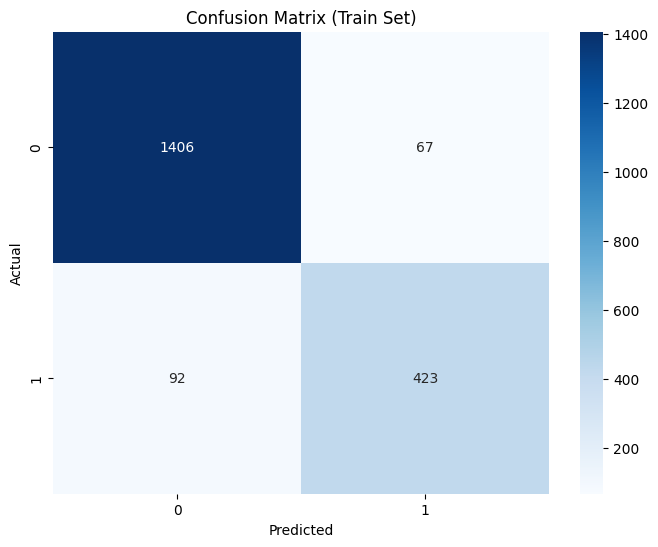

In [70]:
cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Set)')
plt.show()

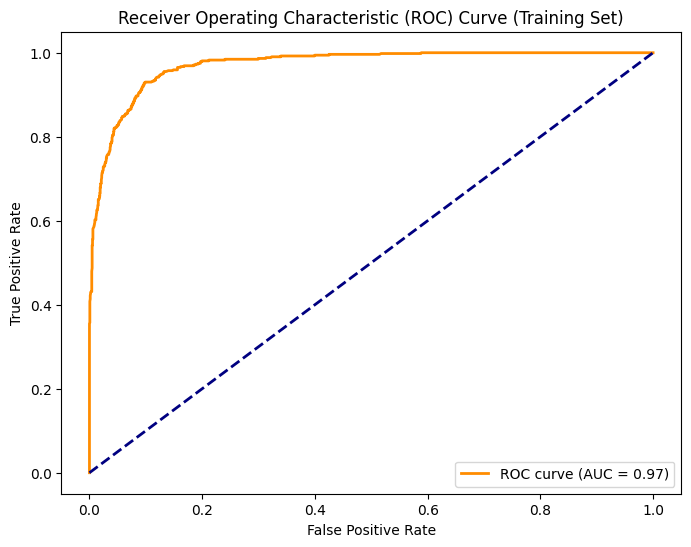

In [71]:
# Get predicted probabilities for training set
y_pred_proba_train = ada_classifier.predict_proba(X_train)[:, 1]

# Calculate ROC curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)

# Calculate AUC for training set
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

# Plot ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend(loc='lower right')
plt.show()


In [72]:
y_pred_ada = ada_classifier.predict(X_test)

test_accuracy_ada = accuracy_score(y_test, y_pred_ada)
test_precision_ada = precision_score(y_test, y_pred_ada)
test_recall_ada = recall_score(y_test, y_pred_ada)
test_f1_ada = f1_score(y_test, y_pred_ada)

print(f'Test Accuracy (AdaBoost): {test_accuracy_ada:.4f}')
print(f'Test Precision (AdaBoost): {test_precision_ada:.4f}')
print(f'Test Recall (AdaBoost): {test_recall_ada:.4f}')
print(f'Test F1 Score (AdaBoost): {test_f1_ada:.4f}')

Test Accuracy (AdaBoost): 0.9109
Test Precision (AdaBoost): 0.8037
Test Recall (AdaBoost): 0.8421
Test F1 Score (AdaBoost): 0.8224


In [73]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       644
           1       0.80      0.84      0.82       209

    accuracy                           0.91       853
   macro avg       0.88      0.89      0.88       853
weighted avg       0.91      0.91      0.91       853



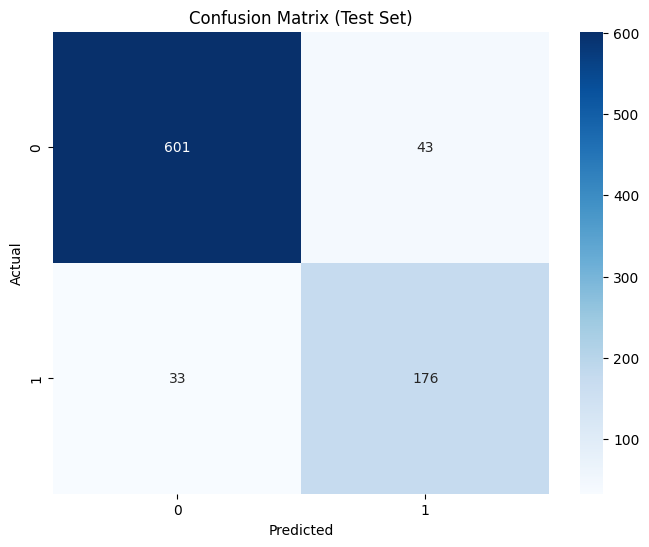

In [74]:
cm = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

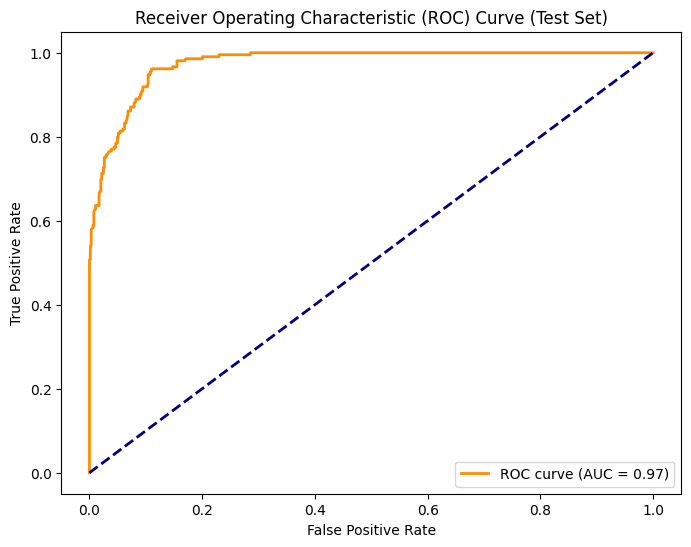

In [75]:
# Get predicted probabilities for test set
y_pred_proba = ada_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC for test set
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()


In [76]:
Xtrain_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
Xtest_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [77]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(Xtrain_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  


In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(Xtrain_cnn, y_train, epochs=100, batch_size=32, validation_data=(Xtest_cnn, y_test))

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6809 - loss: 1.1913 - val_accuracy: 0.7550 - val_loss: 0.4948
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7596 - loss: 0.5055 - val_accuracy: 0.8277 - val_loss: 0.4376
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7694 - loss: 0.4373 - val_accuracy: 0.7749 - val_loss: 0.4522
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7893 - loss: 0.4470 - val_accuracy: 0.8124 - val_loss: 0.3774
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7961 - loss: 0.4102 - val_accuracy: 0.8218 - val_loss: 0.3578
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8057 - loss: 0.3887 - val_accuracy: 0.8148 - val_loss: 0.4099
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8079 - loss: 0.3784 - val_accuracy: 0.8558 - val_loss: 0.3266
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.3517 - val_accuracy: 0.8195 -

In [93]:
model.save('model/cnnclassifier.h5')

In [81]:
y_pred_train_cnn = (model.predict(Xtrain_cnn) > 0.5).astype(int)

train_accuracy_cnn = accuracy_score(y_train, y_pred_train_cnn)
train_precision_cnn = precision_score(y_train, y_pred_train_cnn)
train_recall_cnn = recall_score(y_train, y_pred_train_cnn)
train_f1_cnn = f1_score(y_train, y_pred_train_cnn)

print(f'Train Accuracy (CNN): {train_accuracy_cnn:.4f}')
print(f'Train Precision (CNN): {train_precision_cnn:.4f}')
print(f'Train Recall (CNN): {train_recall_cnn:.4f}')
print(f'Train F1 Score (CNN): {train_f1_cnn:.4f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Train Accuracy (CNN): 0.8999
Train Precision (CNN): 0.7894
Train Recall (CNN): 0.8369
Train F1 Score (CNN): 0.8124


In [83]:
print(classification_report(y_train, y_pred_train_cnn))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1473
           1       0.79      0.84      0.81       515

    accuracy                           0.90      1988
   macro avg       0.87      0.88      0.87      1988
weighted avg       0.90      0.90      0.90      1988



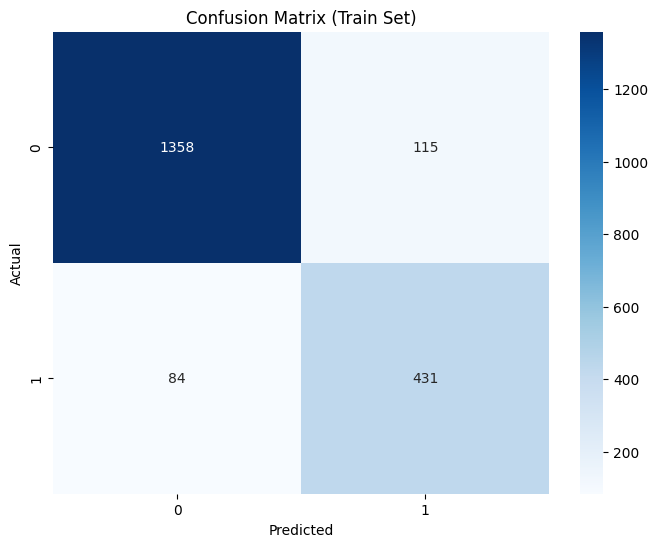

In [84]:
cm = confusion_matrix(y_train, y_pred_train_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Set)')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


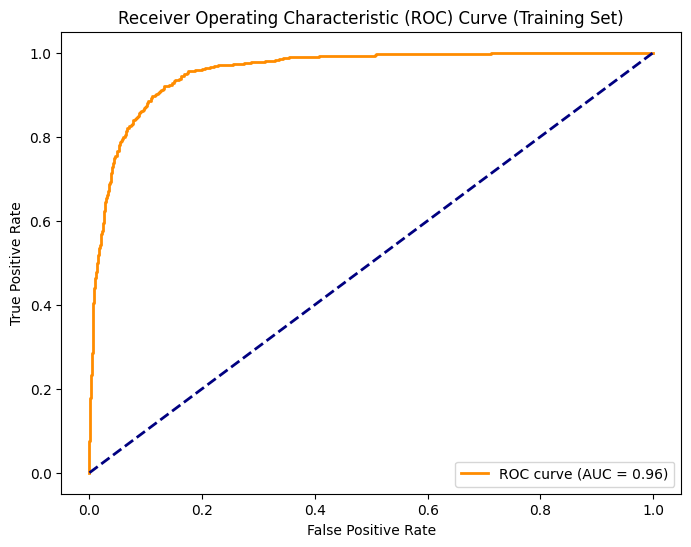

In [85]:
# Get predicted probabilities for training set
y_pred_proba_train_cnn = model.predict(Xtrain_cnn)

# Calculate ROC curve for training set
fpr_train_cnn, tpr_train_cnn, thresholds_train_cnn = roc_curve(y_train, y_pred_proba_train_cnn)

# Calculate AUC for training set
roc_auc_train_cnn = roc_auc_score(y_train, y_pred_proba_train_cnn)

# Plot ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_cnn, tpr_train_cnn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend(loc='lower right')
plt.show()

In [87]:
y_pred_cnn = model.predict(Xtest_cnn)
y_pred_cnn = (y_pred_cnn > 0.5)

test_accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
test_precision_cnn = precision_score(y_test, y_pred_cnn)
test_recall_cnn = recall_score(y_test, y_pred_cnn)
test_f1_cnn = f1_score(y_test, y_pred_cnn)

print(f'Test Accuracy (CNN): {test_accuracy_cnn:.4f}')
print(f'Test Precision (CNN): {test_precision_cnn:.4f}')
print(f'Test Recall (CNN): {test_recall_cnn:.4f}')
print(f'Test F1 Score (CNN): {test_f1_cnn:.4f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy (CNN): 0.8746
Test Precision (CNN): 0.6977
Test Recall (CNN): 0.8612
Test F1 Score (CNN): 0.7709


In [89]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       644
           1       0.70      0.86      0.77       209

    accuracy                           0.87       853
   macro avg       0.82      0.87      0.84       853
weighted avg       0.89      0.87      0.88       853



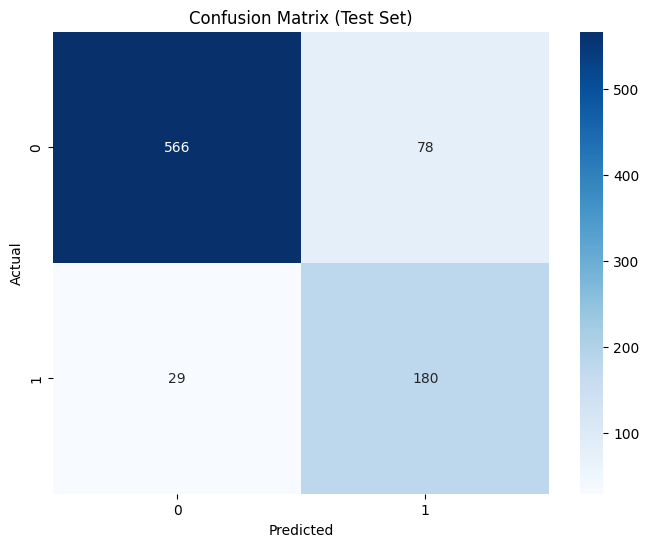

In [90]:
cm = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


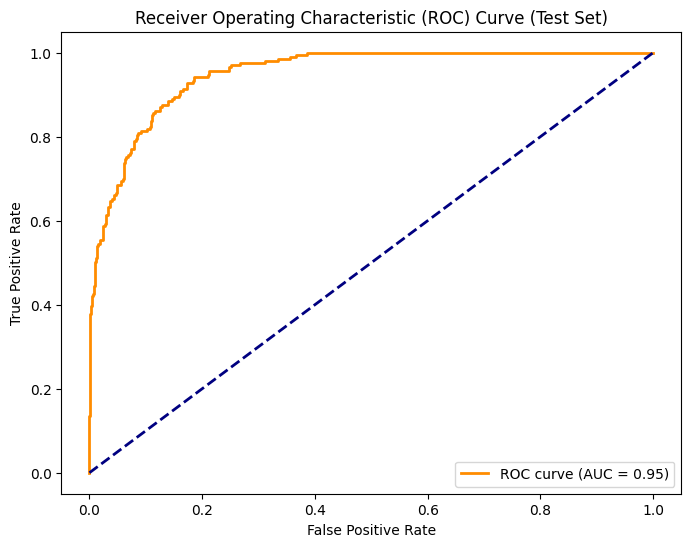

In [91]:
y_pred_proba_cnn = model.predict(Xtest_cnn)

# Calculate ROC curve for test set
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_proba_cnn)

# Calculate AUC for test set
roc_auc_cnn = roc_auc_score(y_test, y_pred_proba_cnn)

# Plot ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

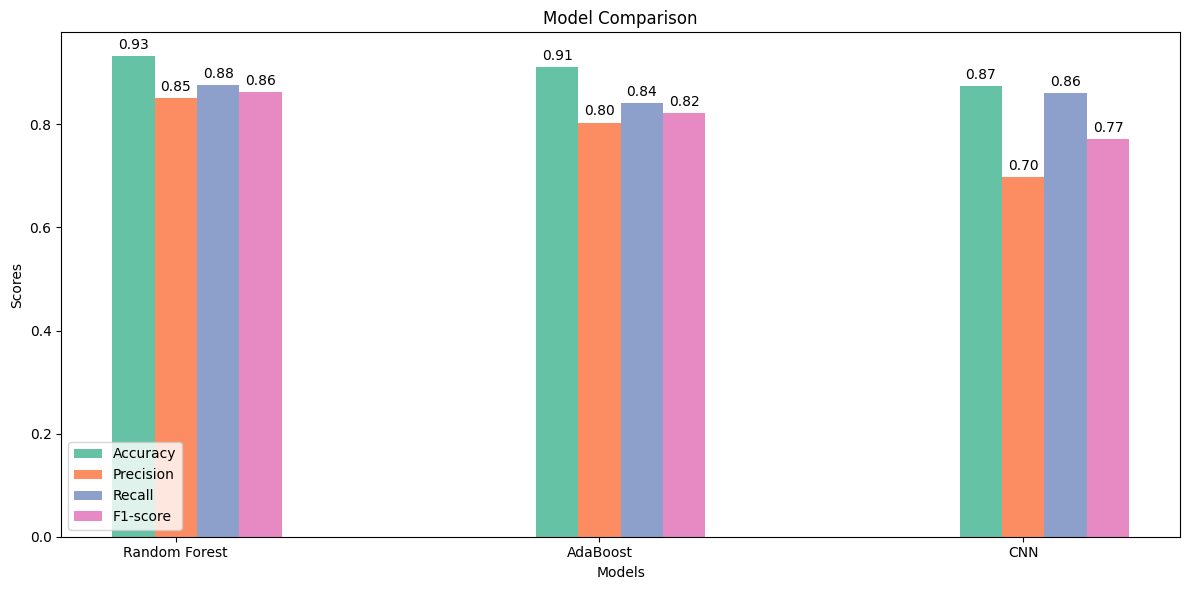

In [92]:
models = ['Random Forest', 'AdaBoost', 'CNN']
accuracy = [test_accuracy, test_accuracy_ada, test_accuracy_cnn]
precision = [test_precision, test_precision_ada, test_precision_cnn]
recall = [test_recall, test_recall_ada, test_recall_cnn]
f1_score = [test_f1, test_f1_ada, test_f1_cnn]

# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(r1, accuracy, bar_width, label='Accuracy')
bars2 = ax.bar(r2, precision, bar_width, label='Precision')
bars3 = ax.bar(r3, recall, bar_width, label='Recall')
bars4 = ax.bar(r4, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)
ax.legend()


# Add value labels on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)


# Display the chart
plt.tight_layout()
plt.show()